In [78]:
using Statistics
using Plots
using LaTeXStrings
using PlotThemes
using LinearAlgebra
plotlyjs();
include("integrator.jl")
theme(:vibrant;)

In [79]:
L = 1
C = 900
K = 210
ρ = 2700
Δt = 0.1
Δx = 0.01
Nₜ = 10000
Nₓ = floor(Int,L/Δx+1)

x = 0:Δx:L


t = 0:Nₜ

T0 = sin.((π*x) / L)

λ = K/(C*ρ)
a = λ*Δt/Δx^2

0.08641975308641975

In [80]:
Teval = FCTS(T0, Δt, Δx, λ, Nₜ, Nₓ);

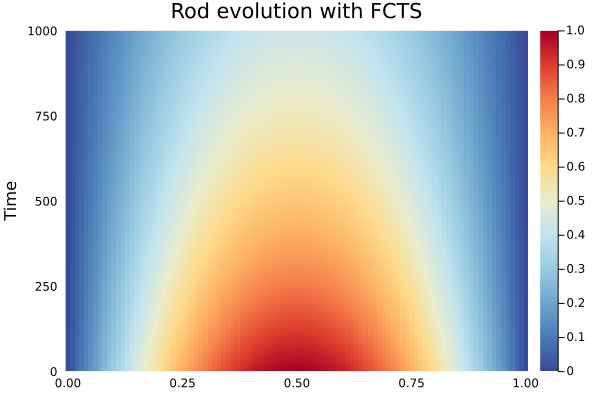

In [57]:
heatmap(x, t.*Δt, Teval, ylabel="Time", title="Rod evolution with FTCS")

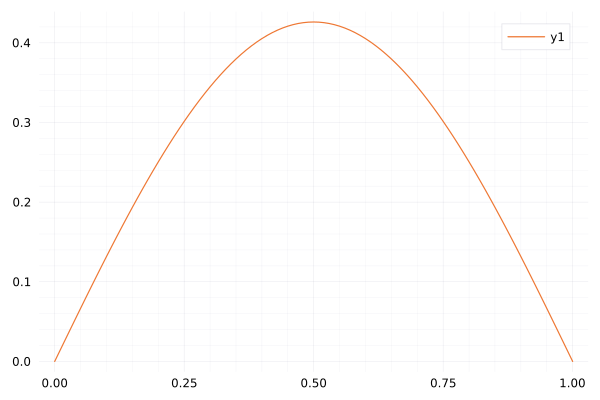

In [58]:
T = Teval[end,:]
plot(x,T)

In [81]:
T0 = T0 = sin.((π*x) / L)
t = 100
Δts = 0.0001:0.0005:0.7
ϵ_Ts = Any[]


res = 0
for Δt in Δts
  Nₜ = floor(Int,t/Δt+2)
  Teval = FCTS(T0, Δt, Δx, λ, Nₜ, Nₓ);
  res = ϵ_T(Teval,t, Δx,Δt, L,K,C,ρ)
  push!(ϵ_Ts, res)
end;

In [60]:
plot(Δts, ϵ_Ts, legend=false)
title!("Error development for FCTS scheme")
xlabel!(L"Time resolution $\Delta t$")
ylabel!(L"Error $\epsilon(100)$")
savefig("saves/error_development_fcts.pdf")

"/Users/simonblaue/ownCloud/Master/Methods for Computaional Physics/Exercises/Ex4/saves/error_development_fcts.pdf"

## Task c

In [61]:
L = 1
C = 900
K = 210
ρ = 2700
Δt = 0.1
Δx = 0.01
Nₜ = 10000
Nₓ = floor(Int,L/Δx+1)

x = 0:Δx:L


t = 0:Nₜ

T0 = sin.((π*x) / L)

λ = K/(C*ρ)

8.641975308641975e-5

In [62]:
a = λ*Δt/Δx^2
A =Tridiagonal([-a for _ in 1:Nₓ-1], [(1+2*a) for _ in 1:Nₓ], [-a for _ in 1:Nₓ-1])
A[1,2] = 0;

In [63]:
Ts = euler_backward(T0, A, Nₜ, Nₓ);

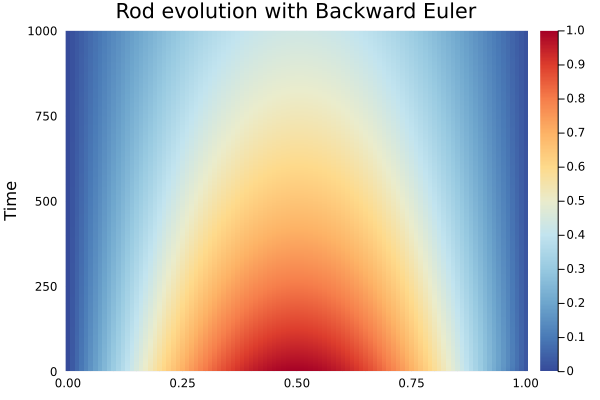

In [64]:
t = 0:Nₜ
heatmap(x, t.*Δt, Ts, ylabel="Time", title="Rod evolution with Backward Euler")

In [65]:
T0 = T0 = sin.((π*x) / L)
t = 100
Δts = 0.0001:0.0005:0.7
ϵ_Ts_eb = Any[]

res = 0
for Δt in Δts
  a = λ*Δt/Δx^2
  A =Tridiagonal([-a for _ in 1:Nₓ-1], [(1+2*a) for _ in 1:Nₓ], [-a for _ in 1:Nₓ-1])
  A[1,2] = 0;
  Nₜ = floor(Int,t/Δt+2)
  Teval = euler_backward(T0, A, Nₜ, Nₓ);
  res = ϵ_T(Teval,t, Δx,Δt, L,K,C,ρ)
  push!(ϵ_Ts_eb, res)
end;

## Crank Nicelson

In [66]:
Nₜ = 10000
Δt = 0.1
t = 0:Nₜ

0:10000

In [67]:
a = λ*Δt/(2*Δx^2)
A =Tridiagonal([-a for _ in 1:Nₓ-1], [(1+2*a) for _ in 1:Nₓ], [-a for _ in 1:Nₓ-1])
A[1,2] = 0;
B =Tridiagonal([a for _ in 1:Nₓ-1], [(1-2*a) for _ in 1:Nₓ], [a for _ in 1:Nₓ-1])
B[1,2] = 0;

In [68]:
Ts = crank_nicolson(T0, A, B, Nₜ, Nₓ);

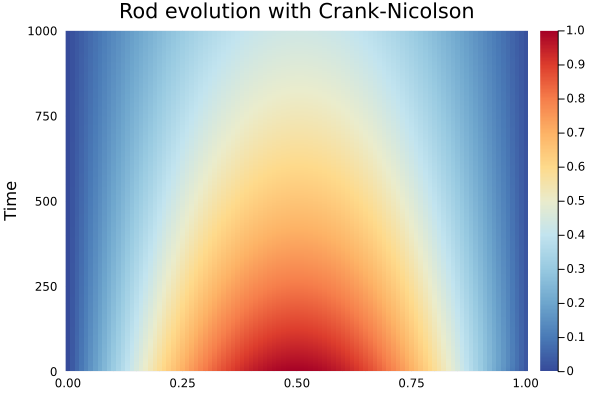

In [69]:
heatmap(x, t.*Δt, Ts, ylabel="Time", title="Rod evolution with Crank-Nicolson")

In [70]:
T0 = T0 = sin.((π*x) / L)
t = 100
Δts = 0.0001:0.0005:0.7
ϵ_Ts_cn = Any[]

res = 0
for Δt in Δts
  a = λ*Δt/(2*Δx^2)
  A =Tridiagonal([-a for _ in 1:Nₓ-1], [(1+2*a) for _ in 1:Nₓ], [-a for _ in 1:Nₓ-1])
  A[1,2] = 0;
  B =Tridiagonal([a for _ in 1:Nₓ-1], [(1-2*a) for _ in 1:Nₓ], [a for _ in 1:Nₓ-1])
  B[1,2] = 0;
  Nₜ = floor(Int,t/Δt+2)
  Teval = crank_nicolson(T0, A, B, Nₜ, Nₓ);
  res = ϵ_T(Teval,t, Δx,Δt, L,K,C,ρ)
  push!(ϵ_Ts_cn, res)
end;

## Dufort-Frankel

In [71]:
Nₜ = 10000
Δt = 0.1
t = 0:Nₜ

0:10000

In [72]:
a = 2*λ*Δt/(Δx^2)
Ts = dufort_frankel(T0, a, Nₜ, Nₓ);

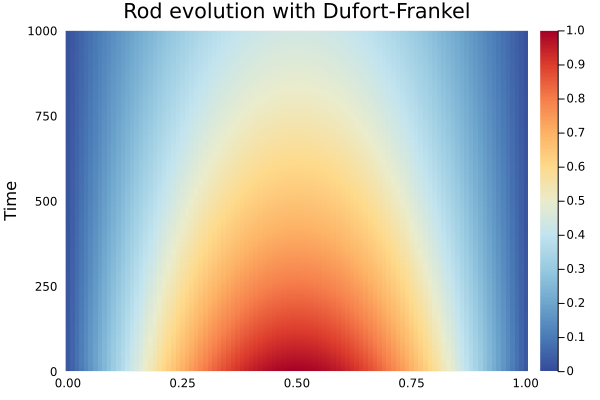

In [73]:
heatmap(x, t.*Δt, Ts, ylabel="Time", title="Rod evolution with Dufort-Frankel")

In [74]:
T0 = T0 = sin.((π*x) / L)
t = 100
Δts = 0.0001:0.0005:0.7
ϵ_Ts_df = Any[]

res = 0
for Δt in Δts
  a = 2*λ*Δt/(Δx^2)
  Nₜ = floor(Int,t/Δt+2)
  Teval = crank_nicolson(T0, A, B, Nₜ, Nₓ);
  res = ϵ_T(Teval,t, Δx,Δt, L,K,C,ρ)
  push!(ϵ_Ts_df, res)
end;

## Collection

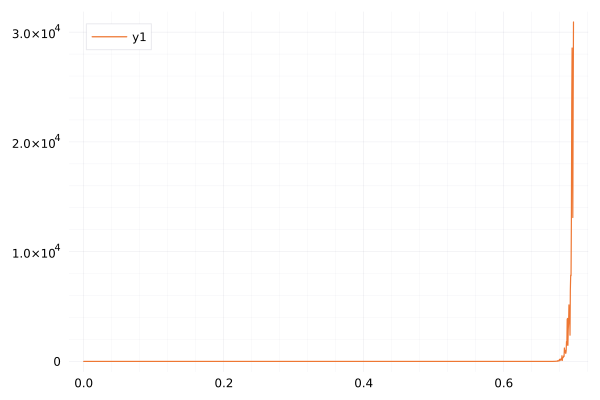

In [82]:
plot(Δts, ϵ_Ts)

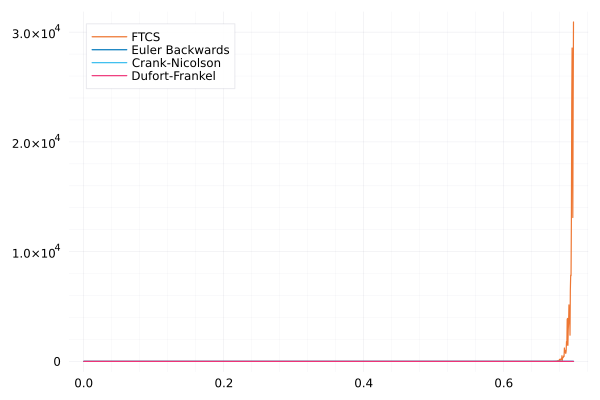

In [75]:
data = [ϵ_Ts, ϵ_Ts_eb, ϵ_Ts_cn, ϵ_Ts_df]
labels = ["FTCS" "Euler Backwards" "Crank-Nicolson" "Dufort-Frankel"]

plot(Δts, data, label=labels)

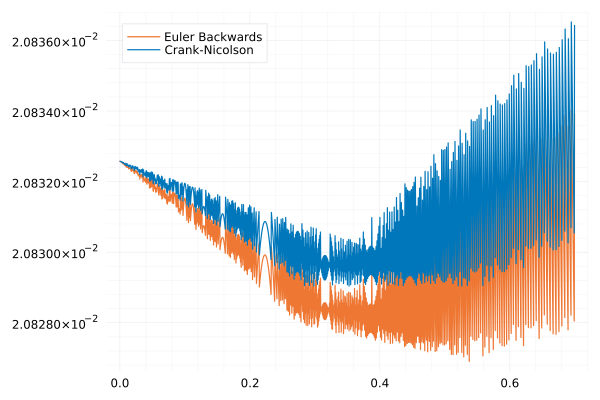

In [76]:
data = [ϵ_Ts_eb, ϵ_Ts_cn]
labels = ["Euler Backwards" "Crank-Nicolson" ]

plot(Δts, data, label=labels)